In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\Mouna\\OneDrive\\Pictures\\Desktop\\remade.csv")
df

,index,cartodb_id,the_geom,the_geom_webmercator,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name,world_label
0,0,1,NaN,NaN,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia,First
1,1,2,NaN,NaN,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania,First
2,2,3,NaN,NaN,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP,Spain,First
3,3,4,NaN,NaN,Slovenia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SVN,Slovenia,Second
4,4,5,NaN,NaN,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD,South Sudan,Third
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,177,178,NaN,NaN,Seychelles,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SYC,Seychelles,Third
178,178,179,NaN,NaN,Gambia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,GMB,Gambia,Third
179,179,180,NaN,NaN,Togo,131,114.33,104,0.01,102,1,123,0.0012,130,0.130,TGO,Togo,Third
180,180,181,NaN,NaN,Trinidad and Tobago,135,124.50,114,0.00,114,0,135,NaN,135,0.000,TTO,Trinidad and Tobago,Third


In [2]:
df1 = df.copy(deep=True)
df1 = df1.drop(['the_geom','the_geom_webmercator','cartodb_id','rw_country_code','rw_country_name','country',
                'cri_rank','fatalities_per_100k_rank','fatalities_rank','losses_per_gdp__rank','losses_usdm_ppp_rank','world_label'],axis=1)

df1["losses_per_gdp__total"].fillna(0,inplace=True)

X = df1.iloc[:,2: ]
y = df1.iloc[:,1:2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

dtr = DecisionTreeRegressor()

In [3]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [4]:
y_pred = dtr.predict(X_test)
print(y_pred)

[ 98.33 124.5   51.33 124.5  124.5   33.    90.33 103.17 103.5   85.83
  35.5  124.5   48.67  59.83  28.17 117.    66.33  41.83 124.5   66.33
 103.17 103.17 124.5   72.33  76.17  52.17  59.83  57.    15.33  72.33
 124.5   66.33  68.67  57.    65.33  85.33  37.67]


In [5]:
ms_score = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(np.sqrt(ms_score))
print(np.sqrt(r2))

6.529759939298295
0.9797809408774586


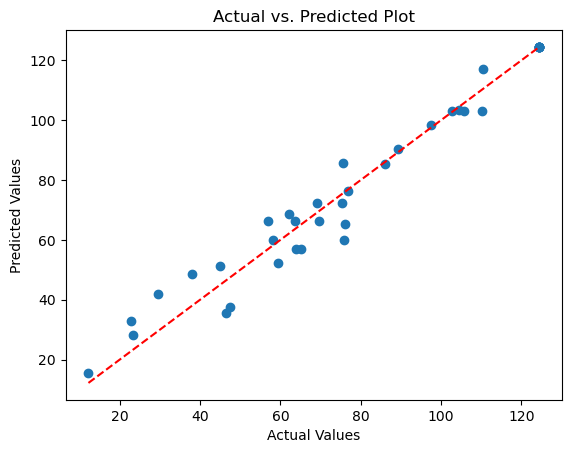

In [6]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Plot")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.show()